In [1]:
import os
os.chdir("C:\\Users\\thoma\\Documents\\UIC\\Courses\\IDS 560 Capstone Project\\Data\\Sales")
import pandas as pd
import numpy as np

In [2]:
Combined_sales = pd.read_csv("Aman_combined_sales.csv")

In [3]:
Combined_sales.head()

,Posting_Date,503,504,505,506,507,510,511,512,508,516,517,514,520
0,1993-01-04 00:00:00.000,27307.12,7963.55,18736.13,4877.38,326.40,13112.10,18723.66,3722.90,0.0,0.0,0.0,0.0,0.0
1,1993-01-05 00:00:00.000,16275.03,14667.70,23931.25,14877.94,2103.95,9846.73,11641.43,3817.63,0.0,0.0,0.0,0.0,0.0
2,1993-01-06 00:00:00.000,33716.12,8421.50,17797.39,8401.71,562.00,10758.62,14670.57,5453.80,0.0,0.0,0.0,0.0,0.0
3,1993-01-07 00:00:00.000,24055.04,11616.85,12740.39,11551.19,3555.40,10865.89,9049.62,647.60,0.0,0.0,0.0,0.0,0.0
4,1993-01-08 00:00:00.000,23000.49,15092.72,11326.61,15440.31,1426.00,10630.88,10381.53,0.00,0.0,0.0,0.0,0.0,0.0


In [4]:
Combined_sales.shape

(795278, 14)

In [41]:
Combined_sales['Date']= pd.to_datetime(Combined_sales.Posting_Date)

In [6]:
# Combined_sales['Date'] = Combined_sales.Posting_Date
Combined_sales['Year'] = Combined_sales['Date'].dt.year
Combined_sales['Month'] = Combined_sales['Date'].dt.month
Combined_sales['Day-Of-Week'] = Combined_sales['Date'].dt.day_name()

In [7]:
Combined_sales.head()

,Posting_Date,503,504,505,506,507,510,511,512,508,516,517,514,520,Date,Year,Month,Day-Of-Week
0,1993-01-04 00:00:00.000,27307.12,7963.55,18736.13,4877.38,326.40,13112.10,18723.66,3722.90,0.0,0.0,0.0,0.0,0.0,1993-01-04,1993,1,Monday
1,1993-01-05 00:00:00.000,16275.03,14667.70,23931.25,14877.94,2103.95,9846.73,11641.43,3817.63,0.0,0.0,0.0,0.0,0.0,1993-01-05,1993,1,Tuesday
2,1993-01-06 00:00:00.000,33716.12,8421.50,17797.39,8401.71,562.00,10758.62,14670.57,5453.80,0.0,0.0,0.0,0.0,0.0,1993-01-06,1993,1,Wednesday
3,1993-01-07 00:00:00.000,24055.04,11616.85,12740.39,11551.19,3555.40,10865.89,9049.62,647.60,0.0,0.0,0.0,0.0,0.0,1993-01-07,1993,1,Thursday
4,1993-01-08 00:00:00.000,23000.49,15092.72,11326.61,15440.31,1426.00,10630.88,10381.53,0.00,0.0,0.0,0.0,0.0,0.0,1993-01-08,1993,1,Friday


In [8]:
Combined_sales.columns

Index(['Posting_Date', '503', '504', '505', '506', '507', '510', '511', '512',
       '508', '516', '517', '514', '520', 'Date', 'Year', 'Month',
       'Day-Of-Week'],
      dtype='object')

In [9]:
Combined_sales['Total_Sales']= Combined_sales.iloc[:, 1:13].sum(axis=1)
Combined_sales.head()

,Posting_Date,503,504,505,506,507,510,511,512,508,516,517,514,520,Date,Year,Month,Day-Of-Week,Total_Sales
0,1993-01-04 00:00:00.000,27307.12,7963.55,18736.13,4877.38,326.40,13112.10,18723.66,3722.90,0.0,0.0,0.0,0.0,0.0,1993-01-04,1993,1,Monday,94769.24
1,1993-01-05 00:00:00.000,16275.03,14667.70,23931.25,14877.94,2103.95,9846.73,11641.43,3817.63,0.0,0.0,0.0,0.0,0.0,1993-01-05,1993,1,Tuesday,97161.66
2,1993-01-06 00:00:00.000,33716.12,8421.50,17797.39,8401.71,562.00,10758.62,14670.57,5453.80,0.0,0.0,0.0,0.0,0.0,1993-01-06,1993,1,Wednesday,99781.71
3,1993-01-07 00:00:00.000,24055.04,11616.85,12740.39,11551.19,3555.40,10865.89,9049.62,647.60,0.0,0.0,0.0,0.0,0.0,1993-01-07,1993,1,Thursday,84081.98
4,1993-01-08 00:00:00.000,23000.49,15092.72,11326.61,15440.31,1426.00,10630.88,10381.53,0.00,0.0,0.0,0.0,0.0,0.0,1993-01-08,1993,1,Friday,87298.54


In [10]:
Combined_sales['Month'].value_counts()

3     78386
5     72900
6     69345
4     68778
8     67722
10    66424
1     66403
11    64684
2     63971
9     61583
7     59635
12    55447
Name: Month, dtype: int64

In [11]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [12]:
table1 = pd.pivot_table(Combined_sales, values='Total_Sales',
                    columns=['Month'], aggfunc=sum).T.reset_index()
table1

,Month,Total_Sales
0,1,86211101.5
1,2,85996813.6
2,3,92953991.4
3,4,86911623.5
4,5,85175724.0
5,6,84337885.1
6,7,79127441.6
7,8,83791018.7
8,9,76486807.5
9,10,85939575.2


In [13]:
table1.shape

(12, 2)

In [14]:
table1.columns

Index(['Month', 'Total_Sales'], dtype='object')

In [15]:
Sales_2019 = Combined_sales[Combined_sales['Year']==2019]
print(Sales_2019.shape)
Sales_2019.head()

(357, 19)


,Posting_Date,503,504,505,506,507,510,511,512,508,516,517,514,520,Date,Year,Month,Day-Of-Week,Total_Sales
794670,2019-01-01,0.0,0.0,0.0,0.0,599.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01,2019,1,Tuesday,599.0
794671,2019-01-02,38101.2,29573.1,25356.8,11295.9,10584.0,7739.5,19763.8,5343.5,0.0,0.0,0.0,797.5,0.0,2019-01-02,2019,1,Wednesday,148555.3
794672,2019-01-03,41406.8,24342.0,22208.8,17405.7,9706.0,6511.3,22196.4,13694.7,0.0,0.0,4698.5,7656.0,0.0,2019-01-03,2019,1,Thursday,169826.0
794673,2019-01-04,26971.3,57880.2,22631.4,21732.5,14896.0,12251.3,21090.4,22321.0,0.0,0.0,3817.6,0.0,0.0,2019-01-04,2019,1,Friday,203591.7
794674,2019-01-05,0.0,199.0,0.0,0.0,16374.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-05,2019,1,Saturday,16573.7


In [29]:
Sales_2020 = Combined_sales[Combined_sales['Year']==2020]
print(Sales_2020.shape)
Sales_2020.head()

(251, 19)


,Posting_Date,503,504,505,506,507,510,511,512,508,516,517,514,520,Date,Year,Month,Day-Of-Week,Total_Sales
795027,2020-01-01,0.0,0.0,0.0,0.0,1198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020,1,Wednesday,1198.0
795028,2020-01-02,39789.3,32094.3,167389.3,14143.9,7788.0,1912.8,15907.3,2323.9,0.0,0.0,614.0,1879.6,0.0,2020-01-02,2020,1,Thursday,283842.4
795029,2020-01-03,43992.9,25176.3,6880.6,4238.0,55115.0,2047.5,19449.3,21488.1,0.0,0.0,2079.1,4940.2,0.0,2020-01-03,2020,1,Friday,185407.2
795030,2020-01-04,0.0,0.0,0.0,0.0,8904.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-04,2020,1,Saturday,8904.0
795031,2020-01-05,0.0,0.0,0.0,0.0,17572.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-05,2020,1,Sunday,17572.7


In [16]:
table2 = pd.pivot_table(Sales_2019, values='Total_Sales',
                    columns=['Month'], aggfunc=sum).T.reset_index()
table2

,Month,Total_Sales
0,1,4605526.4
1,2,4589965.1
2,3,4347953.5
3,4,4161025.2
4,5,4035077.4
5,6,4320769.4
6,7,4247978.3
7,8,4601192.0
8,9,3586972.3
9,10,4730289.4


In [30]:
table4 = pd.pivot_table(Sales_2020, values='Total_Sales',
                    columns=['Month'], aggfunc=sum).T.reset_index()
table4

,Month,Total_Sales
0,1,5072084.0
1,2,3946175.0
2,3,4724265.7
3,4,3801284.1
4,5,2883849.6
5,6,3443512.6
6,7,3579944.4
7,8,2977182.0
8,9,959948.3


[(-1, 12), Text(0.5, 0, 'Months')]

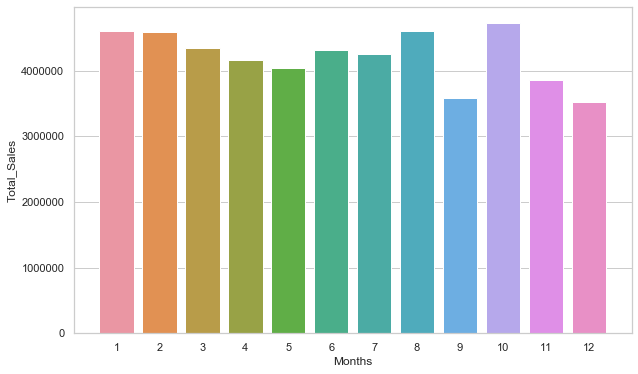

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
# tips = sns.load_dataset("tips
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x = 'Month', y ='Total_Sales',  data=table2)
ax.set(xlim=(-1,12), #ylim = (0,10000000),
       xlabel="Months")

[(-1, 12), Text(0.5, 0, 'Months')]

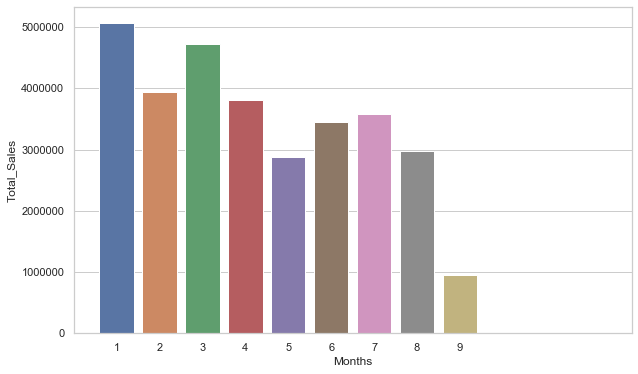

In [31]:
import seaborn as sns
sns.set(style="whitegrid")
# tips = sns.load_dataset("tips
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x = 'Month', y ='Total_Sales',  data=table4)
ax.set(xlim=(-1,12), #ylim = (0,10000000),
       xlabel="Months")

In [20]:
Sales_2019.columns

Index(['Posting_Date', '503', '504', '505', '506', '507', '510', '511', '512',
       '508', '516', '517', '514', '520', 'Date', 'Year', 'Month',
       'Day-Of-Week', 'Total_Sales'],
      dtype='object')

In [21]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
table3 = pd.pivot_table(Sales_2019, values='Total_Sales',
                    columns=['Day-Of-Week'], aggfunc=np.sum).T.reset_index()
table3['Total_Sales'] = round(table3['Total_Sales'],0)
table3

,Day-Of-Week,Total_Sales
0,Friday,8571963.0
1,Monday,9253392.0
2,Saturday,245870.0
3,Sunday,376223.0
4,Thursday,9364286.0
5,Tuesday,11075838.0
6,Wednesday,11709631.0


In [34]:
table5 = pd.pivot_table(Sales_2020, values='Total_Sales',
                    columns=['Day-Of-Week'], aggfunc=np.sum).T.reset_index()
table5['Total_Sales'] = round(table5['Total_Sales'],0)
table5

,Day-Of-Week,Total_Sales
0,Friday,5822880.0
1,Monday,5635881.0
2,Saturday,308445.0
3,Sunday,615251.0
4,Thursday,6029278.0
5,Tuesday,6834437.0
6,Wednesday,6142074.0


Text(0.5, 1.0, 'Sales by Day of Week for 2019')

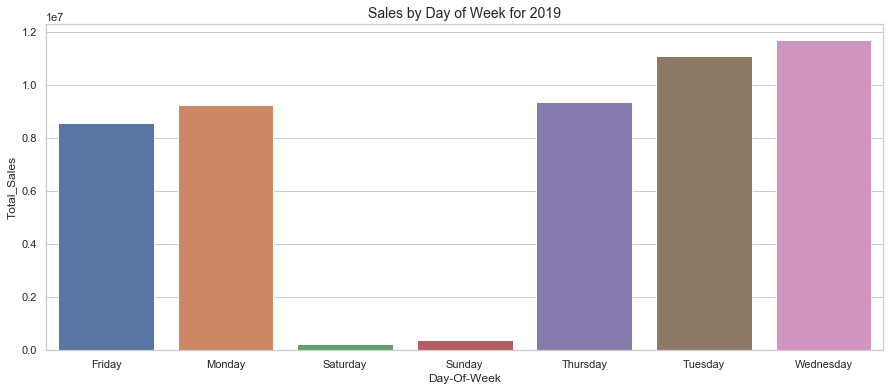

In [38]:
f, ax = plt.subplots(figsize=(15, 6))
# sns.set(ylim=( title = 'Total Sales across Days of Week')
ax = sns.barplot(x = 'Day-Of-Week', y ='Total_Sales',  data=table3)
ax.set_title("Sales by Day of Week for 2019", fontsize = 14)
# ax.set_ylim(0,10000000)
# ax.set(xlabel="Day-Of-Week")

Text(0.5, 1.0, 'Sales by Day of Week for 2020')

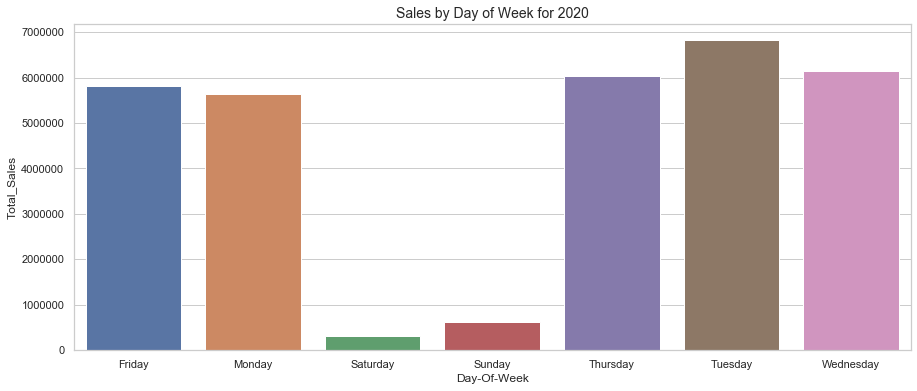

In [39]:
f, ax = plt.subplots(figsize=(15, 6))
# sns.set(ylim=( title = 'Total Sales across Days of Week')
ax = sns.barplot(x = 'Day-Of-Week', y ='Total_Sales',  data=table5)
ax.set_title("Sales by Day of Week for 2020", fontsize = 14)
# ax.set_ylim(0,10000000)
# ax.set(xlabel="Day-Of-Week")

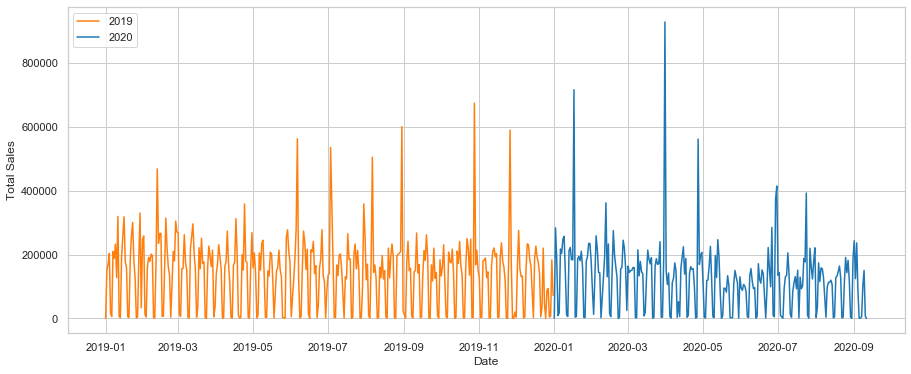

In [33]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(Sales_2019.Date, Sales_2019.Total_Sales, color='tab:orange', label='2019')
ax.plot(Sales_2020.Date, Sales_2020.Total_Sales, color='tab:blue', label='2020')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
# ax.set_title('Buoy Wind Dat')
ax.grid(True)
ax.legend(loc='upper left');

In [ ]:
import plotly.express as px
# df = px.data.stocks()
fig = px.line(Combined_sales, x="Date", y="Total_Sales",
#               Combined_sales={"date": "|%B %d, %Y"},
              title='custom tick labels with ticklabelmode="period"')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [ ]:
# data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = Combined_sales["Total_Sales"].resample('W').mean()
opsd_weekly_mean.head(3)

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(Combined_sales.Posting_Date, Combined_sales.Total_Sales, color='tab:orange', label='Sales')
# ax.plot(Sales_2020.Date, Sales_2020.Total_Sales, color='tab:blue', label='2020')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
# ax.set_title('Buoy Wind Dat')
ax.grid(True)
ax.legend(loc='upper left');

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
table1.plot(kind = 'bar')